# Burlington (Ontario) in a changing climate

In [25]:
# import packages
import pandas as pd 
import numpy as np 
import holoviews as hv
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Download Climate Data

In [28]:
cape_grim_ncei_url = ('https://www.ncei.noaa.gov/access/services/data/v1'
                    '?dataset=daily-summaries&dataTypes=TAVG&'
                    'stations=ASN00091245&startDate=1988-06-01&'
                    'endDate=2023-03-29&units=standard')
cape_grim_ncei_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TAVG&stations=ASN00091245&startDate=1988-06-01&endDate=2023-03-29&units=standard'

In [31]:
# Download the climate data
cape_grim_climate_df = pd.read_csv(
    cape_grim_ncei_url,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN']
)

# Check that the download worked
cape_grim_climate_df.head()

# rename temperature column from TANG (average temperature) 
# to TEMP_F (temperature in Fahrenheit)
cape_grim_climate_units_df = cape_grim_climate_df.rename(columns={
    'TAVG': 'TEMP_F',                                                   # TEMP_F for temperature in Fahrenheit.
})


### Conversion Fahrenheit to Celcius 

<Axes: xlabel='DATE'>

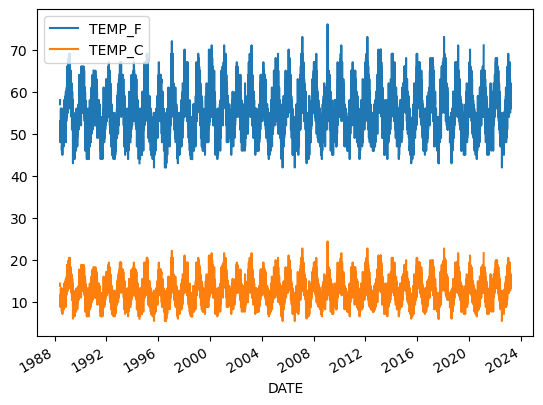

In [32]:
# Convert units with a function
def Fahrenheit_to_Celcius(temperature_F: float):
    """Convert Fahrenheit temperature to Celcius

    :param temperature_F (float): Temperature in Fahrenheit
    """
    return (temperature_F-32) * 5/9 

# execute function
cape_grim_climate_units_df['TEMP_C'] = (
    cape_grim_climate_units_df['TEMP_F'].apply(Fahrenheit_to_Celcius))

cape_grim_climate_units_df.plot()

In [33]:
cape_grim_climate_units_df = cape_grim_climate_units_df[["TEMP_F", "TEMP_C"]]

In [34]:
# Resample data to obtain the mean annual temperature.
ann_cape_grim_climate_units_df = cape_grim_climate_units_df.resample('YS').mean()
ann_cape_grim_climate_units_df.head()

,TEMP_F,TEMP_C
DATE,,
1988-01-01,53.878173,12.154540
1989-01-01,55.502747,13.057082
1990-01-01,55.288462,12.938034
1991-01-01,54.381616,12.434231
1992-01-01,54.214485,12.341380


In [36]:
# Plot the annual data interactively
ann_burlington_plt = ann_cape_grim_climate_units_df.hvplot(y='TEMP_C',
    title='Observed Mean Annual Temperature (C) of Cape Grim [°C]',
    xlabel='Year',
    ylabel='Mean Annual Temperature (Celsius)'
    )

ann_burlington_plt

:Curve   [DATE]   (TEMP_C)